In [1]:
import pandas as pd
import numpy as np

In [2]:
# Читаем файл
solar_data = pd.read_csv('data\solarpower.csv')
solar_data.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_1960\2525412667.py:2: SyntaxWarning: invalid escape sequence '\s'
  solar_data = pd.read_csv('data\solarpower.csv')


,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


**Задание 3.1**

В нашем временном ряде есть несколько пропусков, они обозначены числом `-1`. Заполните пропуски средним арифметическим между двумя соседними наблюдениями:

$$x^*_i = \frac{x_{i+1}+x_{i-1}}{2}$$

>**Совет**: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.

Чему равно среднее арифметическое в столбце cum_power после заполнения пропусков? Ответ округлите до целого.

In [3]:
# 1. Заменить -1 на NaN
solar_data['cum_power'] = solar_data['cum_power'].replace(-1, np.nan)

# 2. Использовать линейную интерполяцию
solar_data['cum_power_filled'] = solar_data['cum_power'].interpolate(method='linear')

# 3. Вычислить среднее арифметическое в заполненном столбце
mean_value = solar_data['cum_power_filled'].mean()

# 4. Округлить результат до целого числа
rounded_mean = round(mean_value)

print(f"Среднее арифметическое в столбце cum_power после заполнения пропусков: {rounded_mean}")


Среднее арифметическое в столбце cum_power после заполнения пропусков: 23848


**Задание 3.3**

Теперь, когда таблица заполнена, создайте столбец `day_power` — ежедневная выработка солнечной энергии.

Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.

>**Совет**: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора` dt.to_period('M')`, который позволяет выделять периоды (в данном случае 'М' — месяц).

Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце `day_power`.

Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.

**Подсказка (1 из 1)**: Ежедневную выработку можно рассчитать как разницу между двумя последовательными показателями `cum_power`. Это можно сделать с помощью метода `diff()`


In [6]:
# Создадим признак day_power
solar_data['day_power'] = solar_data['cum_power'].diff()
# Создадим период (месяц-год)
# Используем аксессор dt.to_period('M')
solar_data['date'] = pd.to_datetime(solar_data['date'])
solar_data['period'] = solar_data['date'].dt.to_period('M')
# Группируем по периодам и рассчитываем среднее значение
solar_group = solar_data.groupby('period')['day_power'].mean()

# Сколько солнечной энергии в среднем в день выработали в 
# марте 2017 года? Округлить до целого
result = solar_group['2017-03']
print(round(result))



11


**Задание 3.3**

Постройте график временного ряда — средней ежедневной выработки солнечной энергии на каждый месяц-год. Не забудьте подписать оси и сам график.

Выберите вывод, который можно сделать из полученного графика:

In [7]:
import matplotlib.pyplot as plt

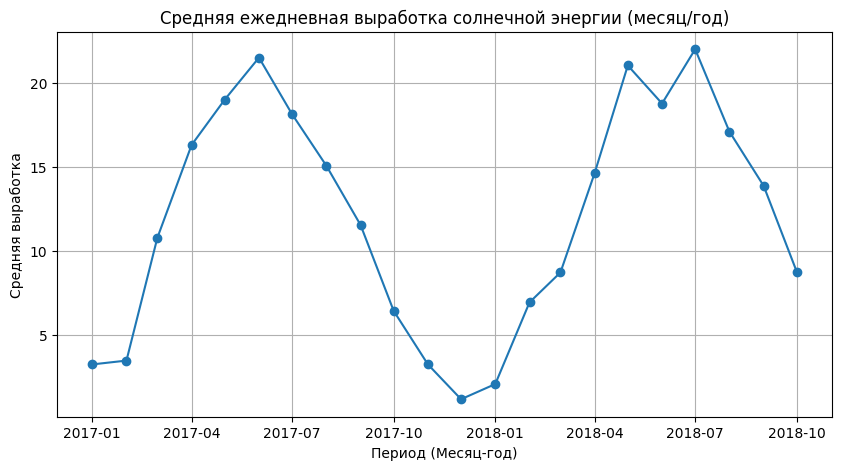

In [9]:
# преобразуем period в формат datetime
solar_group.index = solar_group.index.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(solar_group.index, solar_group.values, marker='o')

# Добавим подписи
plt.title('Средняя ежедневная выработка солнечной энергии (месяц/год)')
plt.xlabel('Период (Месяц-год)')
plt.ylabel('Средняя выработка')
plt.grid(True) # Включение сетки
